In [22]:
from qiskit.quantum_info import Operator
from qiskit import QuantumCircuit
from qiskit import BasicAer, Aer, execute
from qiskit.visualization import plot_histogram
import numpy as np

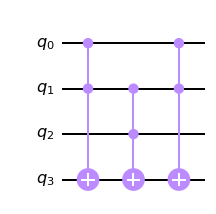

In [25]:
#Inicializamos los qubits
n=4
qc = QuantumCircuit(n)
qc.ccx(0,1,3)
qc.ccx(1,2,3)
qc.ccx(0,1,3)
qc.draw('mpl')

In [26]:
#Función para invertir la amplitud del dato que deseamos
def phase_oracle(n,name = 'Uf'):
    qc = QuantumCircuit(n, name=name)
    qc.ccx(0,1,3)
    qc.ccx(1,2,3)
    qc.ccx(0,1,3)
    
    return qc

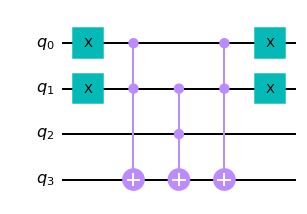

In [28]:
#Recorremos cada uno de los qubits actualizando con sus respectivas amplitudes
n=4
qc = QuantumCircuit(n)
for i in range(n-2):
    qc.x(i)
qc.ccx(0,1,3)
qc.ccx(1,2,3)
qc.ccx(0,1,3)
for i in range(n-2):
    qc.x(i)
qc.draw('mpl')

In [32]:
#Función para el operador Grover
def diffuser(n, name='V'):
    qc = QuantumCircuit(n, name=name)
    
    for qb in range(n-2): # Primera capa de hadammards 
        qc.h(qb)
   
    for i in range(n-2):
        qc.x(i)
    qc.ccx(0,1,3)
    qc.ccx(1,2,3)
    qc.ccx(0,1,3)
    for i in range(n-2):
        qc.x(i)
    
    for qb in range(n-2): #Deshacemos las capas de hadammards
        qc.h(qb)
        
    return qc

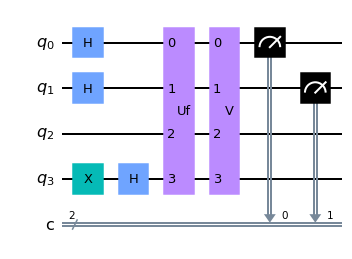

In [31]:
n=4
gr = QuantumCircuit(n, n-2)
nsol=1 

r = int(np.floor(np.pi/4*np.sqrt(2**(n-2)/nsol))) # Determine r
    
gr.h(range(n-2))    # Aplicamos puertas Hadammard a los qubits para la iniciazión

# volvemos los estados a |->
gr.x(n-1)
gr.h(n-1)
    
#Aplicamos las rotaciones del oraculo y el operador Grover
for j in range(r):
    gr.append(phase_oracle(n), range(n))
    gr.append(diffuser(n), range(n))
        
gr.measure(range(n-2), range(n-2))    # medida de todos los qubits
    
gr.draw('mpl')

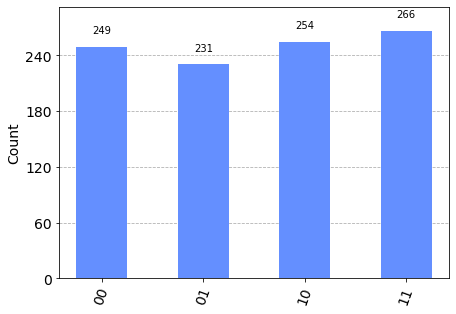

In [33]:
simulator = Aer.get_backend('qasm_simulator')
job = execute(gr, backend=simulator, shots=1000)
counts = job.result().get_counts()

plot_histogram(counts)